In [ ]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
# Downloading the IMDB dataset included in Keras.
# We want to include the most frequently used 10000 words.
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 2s 0us/step


In [ ]:
# Printing a sample, each list corresponds to a different movie review.
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
# Printing the number of samples.
print(f"X_train: {len(X_train)}")
print(f"X_test: {len(X_test)}")

X_train: 25000
X_test: 25000


In [ ]:
# Concatenating X_train and X_test and assing it to a variable X.
X = np.concatenate((X_train, X_test), axis=0)

# Concatenating y_train and y_test and assing it to a variable y.
y = np.concatenate((y_train, y_test), axis=0)

In [ ]:
# Padding all reviews in the X dataset to the length.
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=1024)

In [ ]:
# Creating the training, validation, test datasets.
X_train = X[:40000]
y_train = y[:40000]

X_val = X[40000:45000]
y_val = y[40000:45000]

X_test = X[45000:50000]
y_test= y[45000:50000]

In [ ]:
# Checking the datasets.
print(f"X_train: {len(X_train)}")
print(f"y_train: {len(y_train)}")

print(f"X_val: {len(X_val)}")
print(f"y_val: {len(y_val)}")

print(f"X_test: {len(X_test)}")
print(f"y_test: {len(y_test)}")

X_train: 40000
y_train: 40000
X_val: 5000
y_val: 5000
X_test: 5000
y_test: 5000


In [ ]:
# Creating a model object.
model = tf.keras.Sequential()

In [ ]:
# Adding an embedding layer and a dropout.
# Word embedding refers to a numerical representation of words or text.
model.add(tf.keras.layers.Embedding(input_dim=10000, output_dim=256))
model.add(tf.keras.layers.Dropout(0.7))

In [ ]:
# Adding a LSTM layer with dropout.
model.add(tf.keras.layers.LSTM(256))
model.add(tf.keras.layers.Dropout(0.7))

# Adding a Dense layer with dropout.
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.7))

In [ ]:
# Adding the output layer.
# We using sigmoid activation for binary-classification.
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
# Compiling and optimizing part.
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# Training the model for 5 epochs.
results = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
1250/1250 [==============================] - 200s 154ms/step - loss: 0.6758 - accuracy: 0.5650 - val_loss: 0.6930 - val_accuracy: 0.5066
Epoch 2/5
1250/1250 [==============================] - 105s 84ms/step - loss: 0.6461 - accuracy: 0.6075 - val_loss: 0.5161 - val_accuracy: 0.7642
Epoch 3/5
1250/1250 [==============================] - 91s 72ms/step - loss: 0.3594 - accuracy: 0.8609 - val_loss: 0.2726 - val_accuracy: 0.8924
Epoch 4/5
1250/1250 [==============================] - 90s 72ms/step - loss: 0.2554 - accuracy: 0.9073 - val_loss: 0.2471 - val_accuracy: 0.8982
Epoch 5/5
1250/1250 [==============================] - 87s 70ms/step - loss: 0.2099 - accuracy: 0.9245 - val_loss: 0.2361 - val_accuracy: 0.9058


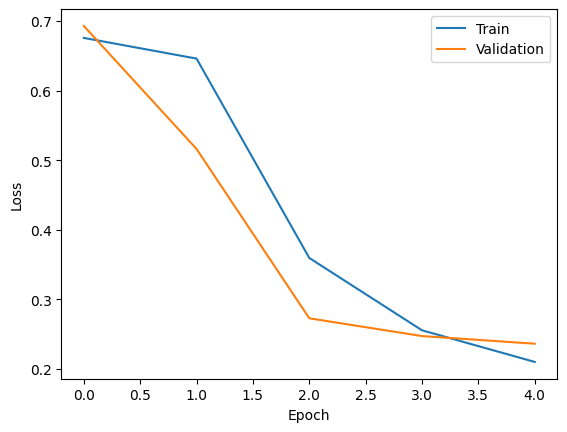

In [ ]:
# Visualizing the results.
plt.plot(results.history["loss"], label="Train")
plt.plot(results.history["val_loss"], label="Validation")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()

plt.show()

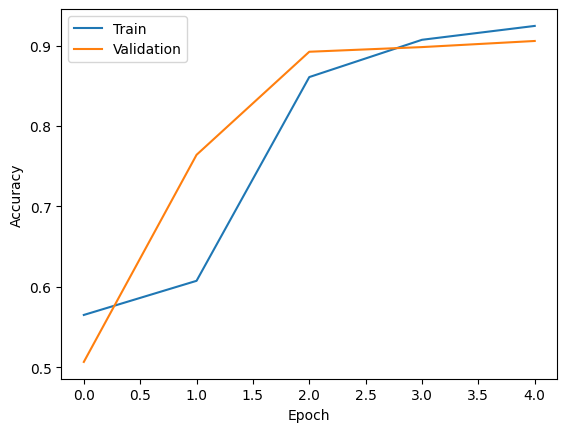

In [ ]:
plt.plot(results.history["accuracy"], label="Train")
plt.plot(results.history["val_accuracy"], label="Validation")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()

plt.show()

In [ ]:
# Evaluating the performance.
model.evaluate(X_test, y_test)

157/157 [==============================] - 4s 26ms/step - loss: 0.2435 - accuracy: 0.9002


[0.24352185428142548, 0.9002000093460083]

In [ ]:
# Making prediction on the reshaped sample.
prediction_result = model.predict(X_test[789].reshape(1, 1024))

print(f"Label: {y_test[789]} | Prediction: {prediction_result}")

# The output is smaller than 0.5, so we say it belongs to zero.

1/1 [==============================] - 1s 550ms/step
Label: 0 | Prediction: [[0.04236465]]
